## Network Intrusion Detector (KDD Cup 1999)

<body> Detecting network intrusions is vital to protecting computer networks from unauthorized users. The 1999 KDD cup tasked participants with building a predictive model, such as a classifier, to detect intrusions on a dummy U.S. Air Force local-area-network (LAN). The data was processed from nine weeks worth of network traffic with four dozen features and a label of normal request or some form of abnormal request for each data point (i.e: request to connect). The data set used for this analysis is the [NSL-KDD data set](https://web.archive.org/web/20150205070216/http://nsl.cs.unb.ca/NSL-KDD/) with the following [description of features included in the data set](http://kdd.ics.uci.edu/databases/kddcup99/task.html).</body> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import time

%matplotlib inline

In [2]:
colnames = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

kddtrain = pd.read_csv("nslkddtrain.csv", header = None, names = colnames)
kddtest = pd.read_csv("nslkddtest.csv", header = None, names = colnames)

In [3]:
pd.options.display.max_columns = 50 # display all columns

kddtrain.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
kddtest.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


## Workflow
<body>
1. Relabel data points as normal or abnormal for test set.  
2. Preprocess data.  
3. Identify relevant features.  
4. KNN or some other density based classification algorithm (GMM, kerndel density estimates) or GLMs (logistic regression) 
</body>

In [5]:
# relabel all attacks as anormaly
kddtest["label"][kddtest["label"] != "normal"] = "anomaly"

C:\Users\XX\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [6]:
kddtest.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


### Functions used in this notebook

In [7]:
def results(y_true, y_pred):
    
    """
    Show confusion matrix, sensitivity, F1 scores, etc for prediction
    
    Input:
        1. y_test, y_pred -  arrays of strings corresponding to normal or abnomal
    
    Output:
        1. classification metrics and confusion matrix
        
    """
    from sklearn.metrics import confusion_matrix as cm
    
    print "confusion matrix : \n", cm(y_true,y_pred)
    #       predicted normal abnormal
    # true
    # normal
    # abnormal
    
    print "\n classification metrics : \n ", sklearn.metrics.classification_report(y_true, y_pred)
    return


In [8]:
def preprocess(df, toscale):
    
    """ Scale and normalize continuous features
        
        Input:
            1. df - dataframe containing all features
            2. toscale - list of continouse features to scale
        
        Output:
            1. df - dataframe aftre processing continuous features
    """
    
    scaler = sklearn.preprocessing.MinMaxScaler()
    for feat in toscale:
        df[feat] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df[feat])),columns=[feat])
        
    return df
    

    

In [9]:
def dropfeature(df, feature):
    
    """ Drop features from dataframe
    
    Input:
        1. df - dataframe containing all the data points and features
        2. feature - list of features to be dropped from dataframe
    
    Output:
        1. df - dataframe after removing some features
    """
    return df.drop(feature, axis = 1)
    
    

In [10]:
def binarize(y_true):
    
    """
    Convert normal or abnormal into list of binary outcomes
    
    Input:
        1. y_true - list of normal and abnormal
    Output:
        1. y_true2 - binarized y_true
        
    """
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    le.fit(["normal", "anomaly"]) # normal 1, abnormal 0
    y_true2 = le.transform(y_true)
    return y_true2

In [11]:
def dummify(df, feature):
    
    """ Replace discrete features from dataframe with dummy variables
    
    Input:
        1. df - dataframe containing all the data points and features
        2. feature - one feature to be turned into dummy variables
    
    Output:
        1. df - dataframe with dummy variables instead of the discrete feature
    
    NOTE: add dummy variables only after scaling data
    """
    dummy = pd.get_dummies(df[feature], prefix = feature)
    df = df.drop(feature, axis = 1,)
    df = df.join(dummy.ix[:, 1:]) # remove one dummy variable to avoid multicolinearity
    
    return df

In [12]:
def catcompareplots(df, feature):
    
    """ Compare discrete feature differences between normal and abnormal requests
    
    Input:
        1. df - dataframe containing all the data points and features
        2. feature - list of features to be compared between normal and abnormal requests
    
    Output:
        1. Count plots comparing normal and abnormal requests for each feature
        
    """
    a = time.time()
    fignum = 1
    for feat in feature:
        plt.figure(fignum)
        sns.countplot(x = feat, hue ="label", data = df)
        plt.yscale("log")
        fignum = fignum + 1
        
    print time.time() - a, "seconds"

    return

In [13]:
def contcompareplots(df, feature):
    """ Compare continuous differences between normal and abnormal requests
    
    Input:
        1. df - dataframe containing all the data points and features
        2. feature - list of features to be compared between normal and abnormal requests
    
    Output:
        1. Violin plots comparing normal and abnormal requests for each feature
        
    """
    a = time.time()
    
    fignum = 1 # counter for number of plots 
    for feat in feature:
        plt.figure(fignum)
        sns.violinplot(x = feat, y = "label", cut = 0, scale = "count", data = df)
        fignum = fignum + 1

    print time.time() - a, "seconds"
    
    return

In [14]:
def histcompareplots(df, feature):
    """ Compare continuous differences between normal and abnormal requests
    
    Input:
        1. df - dataframe containing all the data points and features
        2. feature - list of features to be compared between normal and abnormal requests

    Output:
        1. Overlaid histogram plots of normal and abnormal requests for each feature
        
    """
    a = time.time()
    
    # split into normal and abnormal data frames
    norm = df[df["label"] == "normal"]
    abnorm = df[df["label"] != "normal"]
    
    if type(feature) == str:
        plt.ylabel("Counts")
        plt.xlabel(feature)
        bins = np.linspace(min(df[feature]), 1, 10).tolist() + np.linspace(1, max(df[feature]), 100).tolist()
        norm[feature].plot.hist(alpha = 0.5, bins = bins)
        abnorm[feature].plot.hist(alpha = 0.5, bins = bins)
        plt.yscale("log")
        plt.legend(["normal", "abnormal"])
        plt.title("Comparision of %s between normal & abnormal requests \n" %feature)        

    else:
        fignum = 1 # counter for number of plots 
        for feat in feature:
            plt.figure()
            plt.ylabel("Counts")
            plt.xlabel(feat)
            bins = np.linspace(min(df[feat]), 1, 100).tolist() + np.linspace(1, max(df[feat]), 100).tolist()
            norm[feat].plot.hist(alpha = 0.5, bins = bins)
            abnorm[feat].plot.hist(alpha = 0.5, bins = bins)
            plt.yscale("log")
            plt.legend(["normal", "abnormal"])
            plt.title("Comparision of %s between normal & abnormal requests \n" %feat)        

            fignum = fignum + 1

    print time.time() - a, "seconds"
    
    return

In [15]:
def gridsearch(estimator, df, target, param_grid, scoring = 'f1'):
    """ Grid search for paramters to tune estimator on training set
        
        Input:
            1. estimator - classification model with parameters to tune
            2. df - dataframe for training set after preprocessing and target labels
            3. target - labels for training set
            4. param_grid - values to try for tuning parameters of estimator
            5. scoring - metric to use for scoring estimator, default is F1 score
        Output:
            1. clf.best_estimator_ - estimator chosen from grid search
    
    """
    from sklearn import grid_search
    
    a = time.time()
    
    clf = grid_search.GridSearchCV(estimator = estimator, param_grid = param_grid,
                                   scoring = scoring)
    clf.fit(df, target)
    
    print time.time() - a, " seconds"
    print "\n best parameters : ", clf.best_params_
    # print "\n grid score : ", clf.grid_scores_
    print "\n best estimator: ", clf.best_estimator_
    
    return clf
    

## Looking at continuous features

7.40900015831 seconds


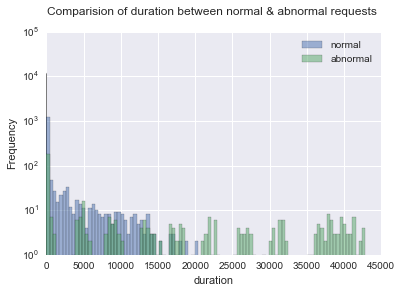

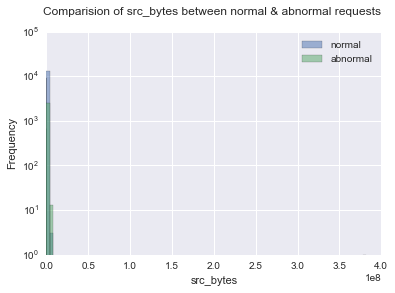

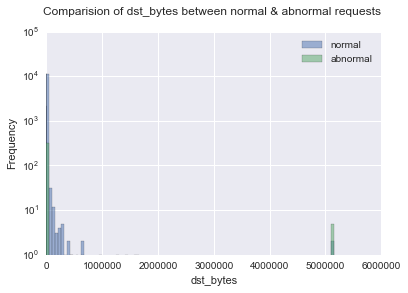

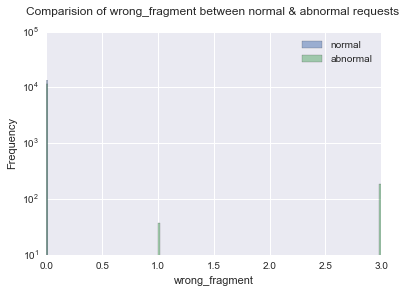

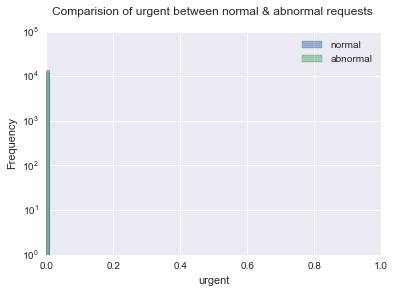

In [16]:
# looking at continuous features
feature = [ "duration", "src_bytes","dst_bytes", 'wrong_fragment', 'urgent']
histcompareplots(kddtrain, feature)

In [17]:
kddtrain.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<body>

After looking at the distribution and interquartile ranges of continuous features, it is evident that a lot of these features have zero values with some large outliers, hence resulting in a discrepancy between the mean and median value. Scaling and normalization with minmax scaler would be better than robust scaler or standard scaler in this case to avoid large variances or zero IQRs. </body>

## Looking at discrete features

2.30499982834 seconds


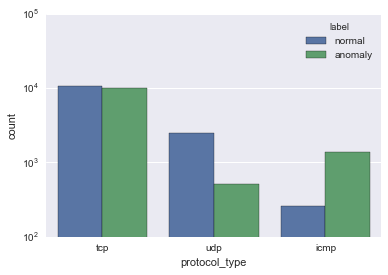

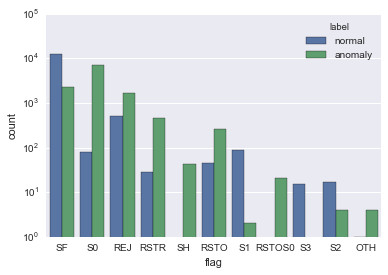

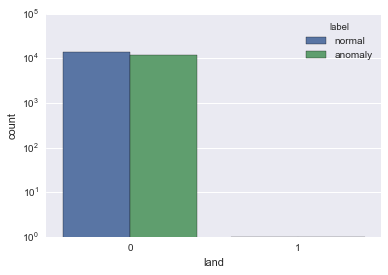

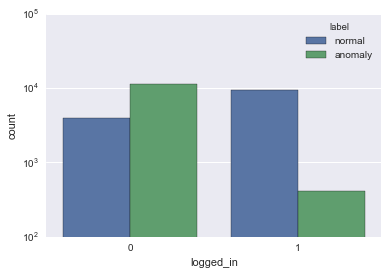

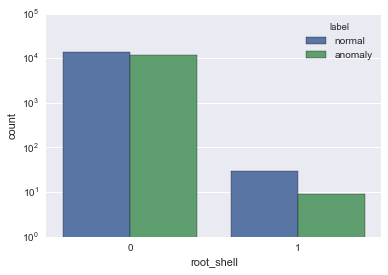

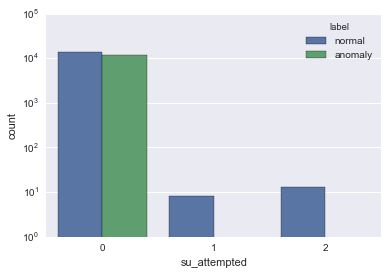

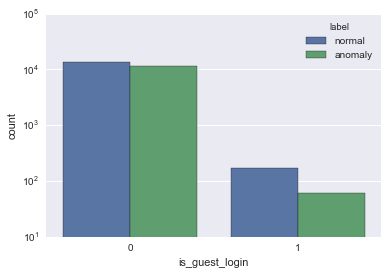

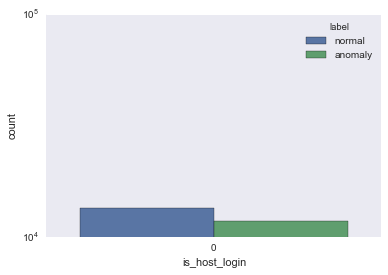

In [18]:
catfeature = ["protocol_type","flag", "land", "logged_in", "root_shell", 
             "su_attempted",  "is_guest_login", "is_host_login"]
catcompareplots(kddtrain, catfeature)

<body>
Looking at the discrete features, logged_in and flag, SF and SO in particular, looks promising for directly classifying normal or abnormal requests. Besides flag and logged_in, the other discrete features will be dropped as they do not seem to provide a clear distinction between normal and abnormal requests. The retained discrete features will be turned into dummy variables.  
</body>

In [19]:
y_true = binarize(kddtest["label"]) # abnormal is 0, normal is 1

# check for consistency
print sum(1 for idx in kddtest.index if kddtest.ix[idx]["label"] == "normal" )
print sum(1 for i in y_true if i == 1)

9711
9711


<body> 
Now scale and normalize continuous features, drop unwanted discrete features and transform retained discrete features into dummy variables.
</body>

In [20]:
# change discrete features into dummy variables, only need to change flag
kddtrain = dummify(kddtrain, "flag")
kddtest = dummify(kddtest, "flag")

In [21]:
# drop unwanted discrete features
todrop = ["protocol_type", "land", "root_shell", "su_attempted",  "is_guest_login",
          "service", "is_host_login"]
kddtrain = dropfeature(kddtrain, todrop)
kddtest = dropfeature(kddtest, todrop)

In [22]:
# list of features to scale
toscale = kddtrain.columns.values.tolist()

In [23]:
toscale = toscale[:-11] # keep only continous features

In [24]:
kddtrain = preprocess(kddtrain, toscale)
kddtest = preprocess(kddtest, toscale)

In [25]:
kddtest.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.448141,0.019569,0.0,0.00,1.0,1.0,0.04,0.06,0.00,1.000000,0.039216,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266145,0.001957,0.0,0.00,1.0,1.0,0.01,0.06,0.00,1.000000,0.003922,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000035,2.066513e-04,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.00,0.0,0.0,1.00,0.00,0.00,0.525490,0.337255,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,3.183413e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.127202,0.0,0.00,0.0,0.0,1.00,0.00,1.00,0.011765,0.223529,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000017,0.000000e+00,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.015656,0.0,0.12,1.0,0.5,1.00,0.00,0.75,0.113725,0.337255,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### KNN Classification

<body>
Classification by KNN with parameter tuning. 
</body>

In [26]:
true_label = binarize(kddtrain["label"])

print sum(true_label) # check that normal is 1
print kddtrain["label"].value_counts()

13449
normal     13449
anomaly    11743
Name: label, dtype: int64


In [27]:
kddtrain = kddtrain.drop("label", axis = 1)
test_label = binarize(kddtest["label"])
kddtest = kddtest.drop("label", axis = 1)

In [28]:
from sklearn.neighbors import KNeighborsClassifier as knn
knn_param_grid = [{'n_neighbors': np.arange(1, 21, 4), 
                  'weights':['uniform', 'distance']}]

In [29]:
# grid search for tuning parameters of knn, 7 min
knn_best = gridsearch(knn(), kddtrain, true_label, knn_param_grid)

594.263000011  seconds

 best parameters :  {'n_neighbors': 1, 'weights': 'uniform'}

 best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [30]:
print knn_best.best_estimator_ # k = 1 is surprisingly the best 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [31]:
pred_label = knn_best.predict(kddtest)

In [32]:
results(test_label, pred_label) 

confusion matrix : 
[[7978 4855]
 [ 639 9072]]

 classification metrics : 
               precision    recall  f1-score   support

          0       0.93      0.62      0.74     12833
          1       0.65      0.93      0.77      9711

avg / total       0.81      0.76      0.75     22544



In [33]:
# trying knn with n = 50, weight = uniform
clf2 = knn(n_neighbors = 50, weights = 'uniform')
clf2.fit(kddtrain, true_label)
pred_label2 = clf2.predict(kddtest)
results(test_label, pred_label2) # almost the same as k = 1

confusion matrix : 
[[8412 4421]
 [ 665 9046]]

 classification metrics : 
               precision    recall  f1-score   support

          0       0.93      0.66      0.77     12833
          1       0.67      0.93      0.78      9711

avg / total       0.82      0.77      0.77     22544



## Nearest Centroid Classification
<body>
Similar to KNN except each class is represented by its centroid and test samples are classified base on the closest centroid. 
</body>

In [34]:
from sklearn.neighbors import NearestCentroid as nc

In [35]:
nc_param_grid = dict(metric = ["euclidean", "manhattan"], shrink_threshold = np.linspace(0, 10, 100))

# grid search for tuning parameters of nearet cenroid, 2 minutes
nc_best = gridsearch(nc(), kddtrain, true_label, nc_param_grid)

91.885999918  seconds

 best parameters :  {'metric': 'euclidean', 'shrink_threshold': 2.7272727272727271}

 best estimator:  NearestCentroid(metric='euclidean', shrink_threshold=2.7272727272727271)


In [36]:
nc_pred = nc_best.predict(kddtest)
results(test_label, nc_pred) # similar result as knn 

confusion matrix : 
[[7219 5614]
 [ 171 9540]]

 classification metrics : 
               precision    recall  f1-score   support

          0       0.98      0.56      0.71     12833
          1       0.63      0.98      0.77      9711

avg / total       0.83      0.74      0.74     22544



## Logistic Regression
<body>
Logistic regression with L1 regularization as most of the features for detecting network intrusion are believed to be noise and only a few important features (eg: logged_in, duration) are informative. L2 regularization is included during the parameter tuning phase.
</body>

In [37]:
from sklearn.linear_model import LogisticRegression as lr

In [38]:
lr_param_grid = dict(C = np.linspace(0.01, 2, 20), penalty = ['l1', 'l2'])
lr_best = gridsearch(lr(), kddtrain, true_label, lr_param_grid)

48.4690001011  seconds

 best parameters :  {'penalty': 'l1', 'C': 1.7905263157894737}

 best estimator:  LogisticRegression(C=1.7905263157894737, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [39]:
lr_pred = lr_best.predict(kddtest)
results(test_label, lr_pred)

confusion matrix : 
[[8185 4648]
 [ 700 9011]]

 classification metrics : 
               precision    recall  f1-score   support

          0       0.92      0.64      0.75     12833
          1       0.66      0.93      0.77      9711

avg / total       0.81      0.76      0.76     22544



In [40]:
# 25524 by 2 array showing proabability for each sample belonging to abnormal or normal
lr_prob = lr_best.predict_proba(kddtest)  
lr_prob

array([[ 0.99510211,  0.00489789],
       [ 0.97931476,  0.02068524],
       [ 0.13205084,  0.86794916],
       ..., 
       [ 0.01499653,  0.98500347],
       [ 0.01915185,  0.98084815],
       [ 0.59030947,  0.40969053]])

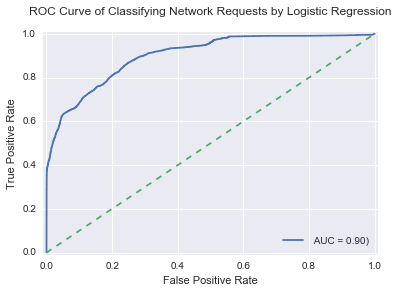

In [41]:
# plot ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(test_label, lr_prob[:, 1])
roc_auc = auc(fpr,tpr)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, label = ' AUC = %0.2f)' % (roc_auc))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Classifying Network Requests by Logistic Regression\n')